In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = name.split('_')[0]
        if value == '0':
            value = 0
        elif value == '1':
            value = 1
        labels.append(value)
        images.append(image)
    return images, labels

In [3]:
# load images from both train and test groups
directory = '../data/BigDataset-anticipation/Train'
images, labels = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
#directory = '../data/Dataset-tg-1-anticipation/Val'
#images_val, labels_val = load_photos(directory)
#nb_images_val = len(images_val)
#print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 1104


In [4]:
#normalise datas
images = np.array(images)
images = images[:, 40:58, :, :]
images /= 255
#images_val = np.array(images_val)
#images_val = images_val[:, 40:58, :, :]
#images_val /= 255

((1104, 18, 160, 3), <matplotlib.image.AxesImage at 0x223b2beab00>)

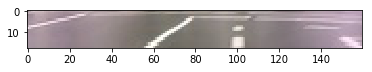

In [5]:
images.shape, plt.imshow(images[104])

In [6]:
#convert labels to np.array
labels = np.array(labels)
#labels_val = np.array(labels_val)

In [7]:
#convert datas to dummyvalues
labelsd = pd.get_dummies(labels)

In [8]:
labelsd.shape, labelsd

((1104, 2),       0  1
 0     1  0
 1     1  0
 2     1  0
 3     1  0
 4     1  0
 5     1  0
 6     1  0
 7     1  0
 8     1  0
 9     1  0
 10    1  0
 11    1  0
 12    1  0
 13    1  0
 14    1  0
 15    1  0
 16    1  0
 17    1  0
 18    1  0
 19    1  0
 20    1  0
 21    1  0
 22    1  0
 23    1  0
 24    1  0
 25    1  0
 26    1  0
 27    1  0
 28    1  0
 29    1  0
 ...  .. ..
 1074  0  1
 1075  0  1
 1076  0  1
 1077  0  1
 1078  0  1
 1079  0  1
 1080  0  1
 1081  0  1
 1082  0  1
 1083  0  1
 1084  0  1
 1085  0  1
 1086  0  1
 1087  0  1
 1088  0  1
 1089  0  1
 1090  0  1
 1091  0  1
 1092  0  1
 1093  0  1
 1094  0  1
 1095  0  1
 1096  0  1
 1097  0  1
 1098  0  1
 1099  0  1
 1100  0  1
 1101  0  1
 1102  0  1
 1103  0  1
 
 [1104 rows x 2 columns])

In [9]:
#convert to np.array again
labelsd = np.array(labelsd)

In [10]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [11]:
#from keras.models import load_model
#model = load_model('model-anticipation.h5')

In [12]:
K.clear_session()

img_in = Input(shape=(18, 160, 3), name='img_in')

x = img_in

x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

flat = Flatten()(x)

x = Dense(20)(flat)
x = Activation('relu')(x)

#categorical output
out = Dense(2, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 18, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 160, 1)        28        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 160, 2)        20        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 160, 2)        38        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 160, 4)        76        
_________________________________________________________________
flatten_1 (Flatten)          (None, 11520)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                230420    
__________

In [15]:
h = model.fit(images, labelsd, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1104/1104 [==============================] - 1s - loss: 0.0632 - acc: 0.9837     
Epoch 2/10
1104/1104 [==============================] - 1s - loss: 0.0551 - acc: 0.9873     
Epoch 3/10
1104/1104 [==============================] - 1s - loss: 0.0411 - acc: 0.9909     
Epoch 4/10
1104/1104 [==============================] - 1s - loss: 0.0324 - acc: 0.9928     
Epoch 5/10
1104/1104 [==============================] - 1s - loss: 0.0240 - acc: 0.9982     
Epoch 6/10
1104/1104 [==============================] - 1s - loss: 0.0194 - acc: 0.9991     
Epoch 7/10
1104/1104 [==============================] - 2s - loss: 0.0175 - acc: 0.9973     
Epoch 8/10
1104/1104 [==============================] - 2s - loss: 0.0216 - acc: 0.9982     
Epoch 9/10
1104/1104 [==============================] - 2s - loss: 0.0249 - acc: 0.9946     
Epoch 10/10
1104/1104 [==============================] - 2s - loss: 0.0155 - acc: 0.9973     


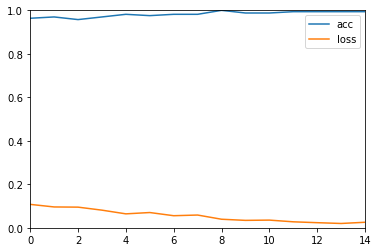

In [44]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [45]:
# Get predictions
all_preds = np.argmax(model.predict(images_val), axis=1)

all_preds, labels_val

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64),
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
import math
i = 0
res = 0
for value in all_preds:
    if value != labels_val[i]:
        res = res + 1
    i = i + 1
res/i

0.21739130434782608

In [16]:
model.save('model-BigDataset-anticipation.h5')

OSError: Unable to open file (Unable to open file: name = 'test_model.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)